# TD4 : Echantillonnage et quantification
Hugo Le Moine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def fonction_triangle(t):
    if (t >= -1) & (t <= 0):
        return 1 + t
    elif (t >= 0) & (t <= 1):
        return 1 - t
    else:
        return 0

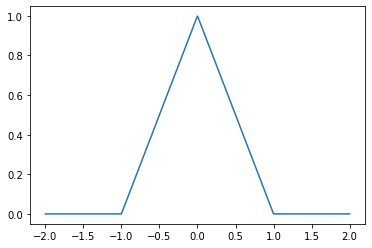

In [3]:
t = pd.Series(np.linspace(-2, 2, 1000))
plt.plot(t, t.apply(fonction_triangle))

## Exercice 1

La fonction triangle est définir par : 

$$
x(t) = \begin{cases} 1 + t & \text{si} \ -1 \leq t \leq 0 \\ 1 - t & \text{si} \ 0 \leq t \leq 1 \\ 0 & \text{sinon} \end{cases}
$$

### Question 1
Calculer sa transformée de Fourier.

Par définition : 
$$
\forall f \in \mathbb{R}, X(f) = \int_{-\infty}^{+\infty}x(t)\exp(-i2\pi ft)dt
$$

En utilisant une intégration par partie :
$$
\begin{align*}
X(f) &= \int_{-1}^{0}x(t)\exp(-i2\pi ft)dt + \int_{0}^{1}x(t)\exp(-i2\pi ft)dt \\
&= \int_{-1}^{0}(1+t)\exp(-i2\pi ft)dt + \int_{0}^{1}(1-t)\exp(-i2\pi ft)dt \\
\end{align*}
$$

Intégration par partie
$$
\int uv'dx = [uv] - \int u'vdx \\
\text{avec}
\begin{cases}
u = 1+t\\
u' = 1 \\
v' = \exp(-i2\pi ft)\\
v = \frac{\exp(-i2\pi ft)}{-2i\pi f}
\end{cases}
$$

$$
\begin{align*}
\int_{-1}^0(1+t)\exp(-i2\pi ft)dt &= \left[(1+t)\frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_{-1}^0 - \int_{-1}^0 \frac{\exp(-i2\pi ft)}{-2i\pi f}dt \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\int_{-1}^0 \exp(-2i\pi ft)dt \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\left[ \frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_{-1}^0 \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\left( \frac{\exp(0)}{-2i\pi f} - \frac{\exp(i2\pi f)}{-2i\pi f} \right) \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{-2^2i^2\pi^2 f^2}\left(1 - \exp(i2\pi f)\right) \\
								  &= \frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(i2\pi f)}{4\pi^2 f^2}
\end{align*}
$$

Intégration par partie
$$
\int uv'dx = [uv] - \int u'vdx \\
\text{avec}
\begin{cases}
u = 1-t\\
u' = -1 \\
v' = \exp(-i2\pi ft)\\
v = \frac{\exp(-i2\pi ft)}{-2i\pi f}
\end{cases}
$$

$$
\begin{align*}
\int_0^1(1-t)\exp(-i2\pi ft)dt &= \left[(1-t)\frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_0^1 - \int_0^1 -1*\frac{\exp(-i2\pi ft)}{-2i\pi f}dt \\
								  &= \frac{1}{2i\pi f} - \frac{1}{2i\pi f}\int_0^1 \exp(-2i\pi ft)dt \\
								  &= \frac{1}{-2i\pi f} - \frac{1}{2i\pi f}\left[ \frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_0^1 \\
								  &= \frac{1}{2i\pi f} - \frac{1}{2i\pi f}\left(\frac{\exp(-i2\pi f)}{-2i\pi f}  - \frac{\exp(0)}{-2i\pi f} \right) \\
								  &= \frac{1}{2i\pi f} - \frac{1}{-2^2i^2\pi^2 f^2}\left(\exp(-i2\pi f) - 1 \right) \\
								  &= -\frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(-i2\pi f)}{4\pi^2 f^2}
\end{align*}
$$

On s'appuie sur les formules suivantes :

- Formule d'Euler : $\cos(x) = \frac{\exp^{ix}+\exp{-ix}}{2}$
- Linéarisation : $\cos(2x) = 1 - 2\sin^2(x)\Rightarrow \sin^2(x) = \frac{1-\cos(2x)}{2}$
- Sinus cardinal : $sinc(x) = \frac{\sin(x)}{x}$


On a ainsi $\forall t \neq 0 $:
$$
\begin{align*}
X(f) &= \frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(i2\pi f)}{4\pi^2 f^2} -\frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(-i2\pi f)}{4\pi^2 f^2} \\
&= \frac{2}{4\pi^2f^2} - \frac{\exp(i2\pi f) + \exp(-i2\pi f)}{4\pi^2f^2} \\
&= \frac{2\cos(2\pi f) - 2}{-4\pi^2f^2} \\
&= \frac{\cos(2\pi f)-1}{-2\pi^2f^2}\\
&= \frac{\sin^2(\pi f)}{\pi^2f^2} \\
&= \left( \frac{\sin(\pi f)}{\pi f} \right)^2 \\
&= (sinc(\pi f))^2
\end{align*}
$$

Pour $t \neq 0$ :
$$
\begin{align*}
X(0) &= \int_{-\infty}^{+\infty} x(t)\exp(-i2\pi 0t)dt \\
&= \int_{-1}^1 x(t) dt \\
&= 1
\end{align*}
$$

Au final :
$$
X(f) = \begin{cases} (sinc(\pi f))^2, & t\neq 0 \\ 1, & t=0 \end{cases}
$$

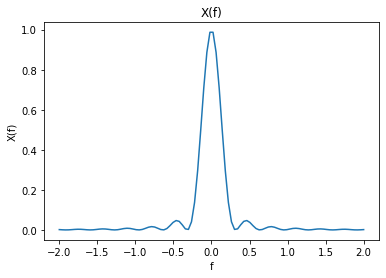

In [5]:
x = np.linspace(-2, 2, 100)
y = (np.sinc(np.pi * x))**2
plt.plot(x, y)
plt.title("X(f)")
plt.xlabel('f')
plt.ylabel('X(f)')
plt.show()

### Question 2
Quelle fréquence d’échantillonnage devrait-on choisir pour ce signal? 

D'après le théorème de Nyquist-Shannon, il faut choisir la fréquence d'échantillonnage $F_e$ telle que :
$$
F_e \geq 2f_{max}
$$
Hors $\forall f : X(f)>0$, ce qui empèche l'application de ce théorème puisqu'il n'existe pas de fréquence maximale $f_{max}$ dans le signal correspondant à la fonction triangle.


### Question 3
On considère qu’une fréquence d’échantillonnage Fe est raisonnable si : 
$$
\forall f \geq F_e, \left| \frac{X(f)}{X(0}\right| \leq 10^{-2}
$$
Calculer Fe puis représenter graphiquement le signal échantillonné.

$$
\begin{align*}
	\forall f \geq F_e : \left| \frac{X(f)}{X(0)} \right| &\leq 10^{-2} \\
	\left|\frac{X(f)}{1}\right| &\leq 10^{-2} \\
	\left|X(f)\right| &\leq 10^{-2} \\
	\left|\left(\frac{\sin(\pi f)}{\pi f}\right)^2\right| &\leq 10^{-2} \\
	\left|\frac{\sin(\pi f)}{f}\right| &\leq \pi10^{-1} \\
\end{align*}
$$

On peut considérer la valeur maximale que peut prendre $|sin(\pi f)|$ qui est de 1 pour simplifier les calculs. Sachant que $f > 0$ :

$$
\begin{align*}
	\left|\frac{\sin(\pi f)}{f}\right| &\leq \pi10^{-1} \\
	\frac{1}{f} &\leq \pi10^{-1} \\
	f &\geq \frac{1}{\pi10^{-1}} \\
	f &\geq 3.18\text{Hz}
\end{align*}
$$

In [6]:
f = 1/(np.pi * 1e-1)

In [7]:
start = -2
end = 2
t = pd.Series(np.linspace(start, end, int(np.ceil((end-start)*f))))

Text(0.5, 1.0, 'Fonction triangle avec $F_e = $3.18Hz')

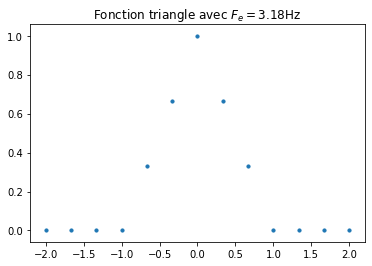

In [8]:
plt.scatter(t, t.apply(fonction_triangle), s=10)
plt.title('Fonction triangle avec $F_e = ${:.2f}Hz'.format((f)))

## Exercice 2
### Question 1
Calculer la puissance moyenne du signal s

$$
\begin{align*}
	P(s) &= \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}\left|s(t)^2\right|dt \\
		 &= \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}  \left|t^2\right|dt \\
		 &= \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} t^2 dt \\
		 &= \frac{1}{T}\left[\frac{t^3}{3}\right]_{-\frac{T}{2}}^{\frac{T}{2}} \\
		 &= \frac{1}{1}\left(\frac{0.5^3}{3} - \frac{(-0.5)^3}{3}\right) \\
		 &= 0.0833
\end{align*}
$$

In [9]:
P1 = (0.5**3)/3 - ((-0.5)**3)/3
P1

0.08333333333333333

### Question 2
On considère un échantillonnage du signal uniforme, avec une fréquence d'échantillonnage q = 1/n. Tracer le signal échantillonné pour n = 5.

In [10]:
n = 5
q = 1/n
t = np.arange(-2, 2, q)
s_t = (t + 0.5) % 1 - 0.5

n2 = 1000
q2 = 1/n2
t2 = np.arange(-2, 2, q2)
s_t2 = (t2 + 0.5) % 1 - 0.5

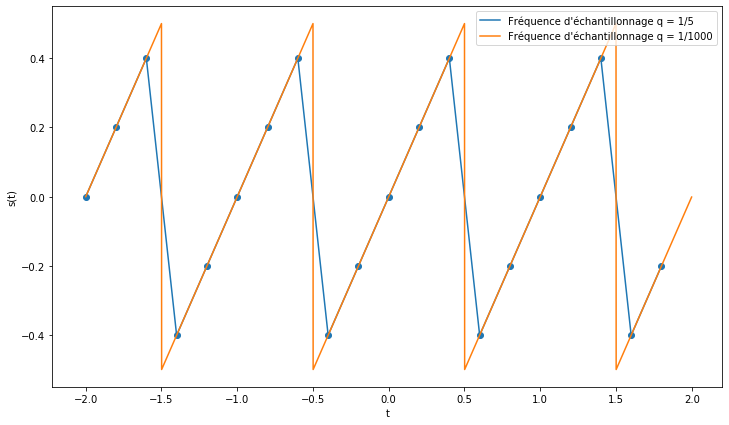

In [11]:
plt.figure(figsize=(12,7))
plt.plot(t, s_t, label='Fréquence d\'échantillonnage q = 1/{}'.format(n))
plt.scatter(t, s_t)
plt.plot(t2, s_t2,label= 'Fréquence d\'échantillonnage q = 1/{}'.format(n2))
plt.xlabel('t')
plt.ylabel('s(t)')
plt.legend()

### Question 3
En déduire que l’erreur d'échantillonnage e est également un signal en dents de scie dont on précisera l’amplitude et la période. 

L'erreur d'échantillonnage apparaît sur le delta de temps non couvert par la fréquence d'échantillonnage utilisée et pour lequel la pente change. 
Par exemple, sur l'intervalle $[2q, 3q]$, qui correspond au "saut", on observe une erreur liée à la fréquence d'échantillonnage utilisée.
La période est la même que celle du signal de référence soit 1, et l'amplitude est de $s\left(\frac{T}{2}\right) = \frac{1}{2}$


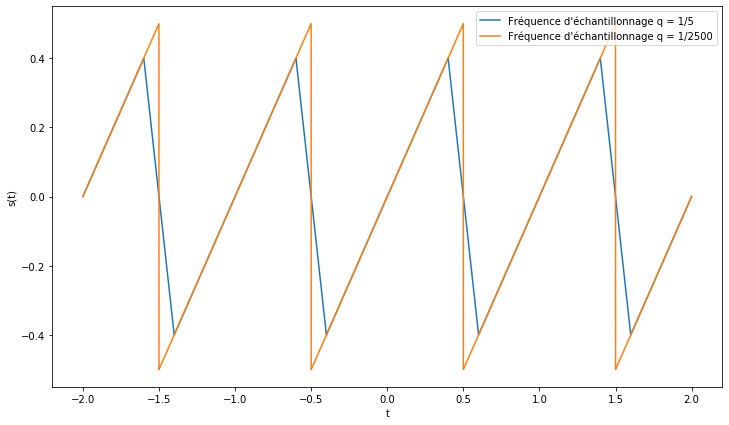

In [12]:
t = np.linspace(-2,2,10000)
s_t1 = [(i+0.5)%1 - 0.5 if (i%1 < 2*q) | (i%1 >= 3*q) else 2*q*(1 - 2*((i%1)/q)%2) for i in t]
s_t2 = (t + 0.5) % 1 - 0.5
plt.figure(figsize=(12,7))
plt.plot(t, s_t1, label='Fréquence d\'échantillonnage q = 1/{}'.format(n))
plt.plot(t, s_t2, label='Fréquence d\'échantillonnage q = 1/{}'.format(2500))
plt.legend()
plt.xlabel('t')
plt.ylabel('s(t)')
plt.show()

Text(0.5, 1.0, "Erreur d'échantillonnage entre q = 1/5 et q = 1/2500")

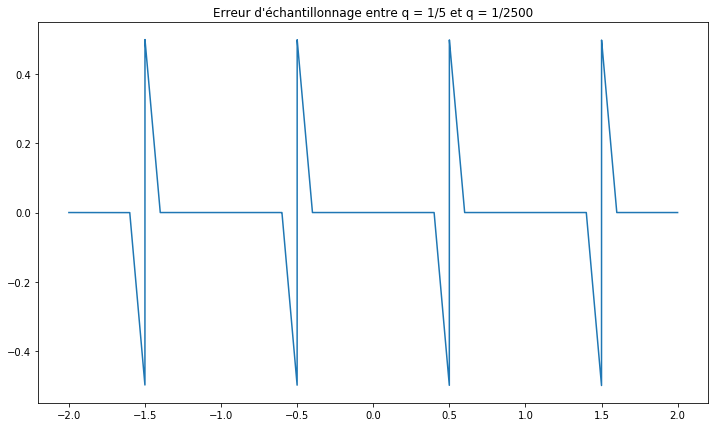

In [13]:
plt.figure(figsize=(12,7))
plt.plot(t, s_t1 - s_t2)
plt.title('Erreur d\'échantillonnage entre q = 1/5 et q = 1/2500')

### Question 4
Calculer le rapport signal sur bruit dû à une quantiﬁcation de pas q.

Soit $e(t)$ l'erreur de quantification en fonction de $t$. Il faut calculer la puissance du signal correspondant à cette erreur.
$$
\begin{align*}
	P(s) &= \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}\left|s(t)^2\right|dt \\
		 &= \frac{1}{T}\left[\int_{-\frac{T}{2}}^{-2q}|e(t)|^2dt + \int_{2q}^{-\frac{T}{2}}|e(t)|^2dt\right] \\
		 &= \frac{1}{T}*2\int_{2q}^{\frac{T}{2}} \left(\frac{1/2}{T/2 - 2q}(t-2q)\right)^2dt \\
		 &= \frac{1}{T} *2\int_0^{\frac{1}{2}q} \left(\frac{1/2}{(1/2)(1/5)}t\right)^2dt \\
		 &= \frac{1}{T} *2\int_0^{\frac{1}{2}q}\left(5t\right)^2dt \\
		 &= \frac{1}{T} *2\int_0^{\frac{1}{2}q}25t^2dt \\
		 &= \frac{1}{T} *2*25\left[\frac{t^3}{3}\right]_0^{\frac{1}{2}q} \\
		 &= \frac{1}{T} *50\frac{\left(\frac{1}{2}q\right)^3}{3} \\
		 &= \frac{1}{T}50\frac{\left(\frac{1}{10}\right)^3}{3} \\
		 &=50*10^{-3}/3 \\
		 &= 0.0166
\end{align*}
$$

In [14]:
P1/(1e6)

8.333333333333333e-08

In [15]:
P0 = 50 * 1e-3/3
P0

0.016666666666666666

In [16]:
SNR = 10*np.log10(P1/P0)
print('SNR = {:.2f}dB'.format(SNR))

SNR = 6.99dB


### Question 5
Pour un produit audio, on considère que la qualité est « bonne » à partir d’un SNR de 60 dB. Combien de bits faut-il disposer pour garantir un rapport signal sur bruit supérieur à 60 dB?

$$
\begin{align*}
SNR \geq 60dB &\Leftrightarrow  10\log_{10}\left(\frac{P_1}{P_0}\right) \geq 60 \\
&\Leftrightarrow \frac{P_1}{P_0} \geq 10^6 \\
&\Leftrightarrow P_0 \leq \frac{P_1}{10^6} \\
&\Leftrightarrow P_0 \leq 8.333*10^{-8} \\
&\Leftrightarrow \frac{1}{T} * 2 * n^2 * \frac{(\frac{1}{2}*\frac{1}{n})^3}{3} \leq 8.333*10^{-8} \\
&\Leftrightarrow \frac{2n^2}{8n^3}/3 \leq 8.333*10^{-8} \\
&\Leftrightarrow \frac{1}{12n} \leq 8.333*10^{-8} \\
&\Leftrightarrow n \geq 10^{6} \\
\end{align*}
$$


In [17]:
n = 1/(12*P1/1e6)
n

1000000.0